# Setup

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Download the dataset from Kaggle if it doesn't exist
if not os.path.exists("movies.csv"):
    !kaggle datasets download -d sayeeduddin/netflix-2025user-behavior-dataset-210k-records
    !unzip netflix-2025user-behavior-dataset-210k-records.zip
    os.remove("netflix-2025user-behavior-dataset-210k-records.zip")

In [4]:
base_path = os.getcwd()
files = {
    "movies": "movie_id",
    "recommendation_logs": "recommendation_id",
    "reviews": "review_id",
    "search_logs": "search_id",
    "users": "user_id",
    "watch_history": "session_id"
}
for file, index_col in files.items():
    globals()[file] = pd.read_csv(f"{base_path}/{file}.csv", index_col=index_col)

# Exploratory Data Analysis

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15450 entries, review_000001 to review_013025
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            15450 non-null  object 
 1   movie_id           15450 non-null  object 
 2   rating             15450 non-null  int64  
 3   review_date        15450 non-null  object 
 4   device_type        15450 non-null  object 
 5   is_verified_watch  15450 non-null  bool   
 6   helpful_votes      13635 non-null  float64
 7   total_votes        13635 non-null  float64
 8   review_text        14665 non-null  object 
 9   sentiment          15450 non-null  object 
 10  sentiment_score    14241 non-null  float64
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [6]:
reviews.head()

,user_id,movie_id,rating,review_date,device_type,is_verified_watch,helpful_votes,total_votes,review_text,sentiment,sentiment_score
review_id,,,,,,,,,,,
review_000001,user_07066,movie_0360,4,2025-03-29,Mobile,False,3.0,5.0,Fantastic cinematography and plot twists.,positive,0.711
review_000002,user_02953,movie_0095,5,2024-07-19,Mobile,True,2.0,2.0,This series is a masterpiece!,positive,0.645
review_000003,user_05528,movie_0518,4,2025-02-11,Tablet,True,2.0,5.0,Fantastic cinematography and plot twists.,positive,0.730
review_000004,user_07612,movie_0672,5,2025-11-26,Mobile,True,7.0,7.0,One of the best series I've ever watched. High...,positive,0.798
review_000005,user_03424,movie_0580,3,2025-07-11,Mobile,True,1.0,5.0,Mixed feelings about this one.,neutral,0.410


In [7]:
# Filter the data to only include the verified watch
reviews = reviews[reviews['is_verified_watch']]
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12447 entries, review_000002 to review_013025
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            12447 non-null  object 
 1   movie_id           12447 non-null  object 
 2   rating             12447 non-null  int64  
 3   review_date        12447 non-null  object 
 4   device_type        12447 non-null  object 
 5   is_verified_watch  12447 non-null  bool   
 6   helpful_votes      11027 non-null  float64
 7   total_votes        11027 non-null  float64
 8   review_text        11823 non-null  object 
 9   sentiment          12447 non-null  object 
 10  sentiment_score    11462 non-null  float64
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 1.1+ MB


In [8]:
# Check the types of sentiments
reviews['sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In the `reviews` dataset, there are three categories of sentiments, `positive`, `neutral` and `negative`.
Let's explore the distribution and counts.

[Text(0, 0, 'positive'), Text(1, 0, 'neutral'), Text(2, 0, 'negative')]

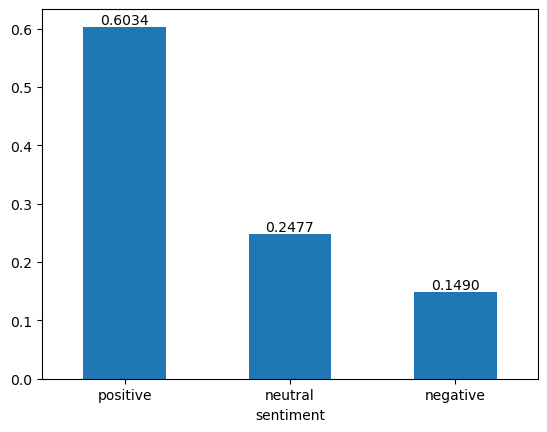

In [9]:
ax = reviews['sentiment'].value_counts(normalize=True).round(4).plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

Most of the reviews are positive which accounts to 60.34% of the total reviews. The rest are neutral and negative at 24.77% and 14.90% respectively.

There's also a feature called `sentimental_score`. Let's see what constitute a `positive`, `neutral`, and `negative`.

In [10]:
for sentiment in reviews['sentiment'].unique():
    subset = reviews[reviews['sentiment'] == sentiment]
    print(sentiment)
    print(f"- max: {subset['sentiment_score'].max():.4f}")
    print(f"- min: {subset['sentiment_score'].min():.4f}\n")

positive
- max: 1.0000
- min: 0.6000

neutral
- max: 0.6000
- min: 0.4000

negative
- max: 0.4000
- min: 0.0000



Now that we know the boundaries of each `sentiment_score`. Let's expore the most reviewed movies.

In [ ]:
reviews = pd.merge(reviews, movies[['title', 'content_type', 'genre_primary']], left_on='movie_id', right_index=True, how='left')
reviews.head

,user_id,movie_id,rating,review_date,device_type,is_verified_watch,helpful_votes,total_votes,review_text,sentiment,sentiment_score,title,content_type,genre_primary
review_id,,,,,,,,,,,,,,
review_000002,user_02953,movie_0095,5,2024-07-19,Mobile,True,2.0,2.0,This series is a masterpiece!,positive,0.645,Legend Storm,TV Series,Fantasy
review_000003,user_05528,movie_0518,4,2025-02-11,Tablet,True,2.0,5.0,Fantastic cinematography and plot twists.,positive,0.730,A Quest,Movie,Horror
review_000004,user_07612,movie_0672,5,2025-11-26,Mobile,True,7.0,7.0,One of the best series I've ever watched. High...,positive,0.798,Kingdom Dream,Movie,Biography
review_000005,user_03424,movie_0580,3,2025-07-11,Mobile,True,1.0,5.0,Mixed feelings about this one.,neutral,0.410,Last Love,Stand-up Comedy,Crime
review_000006,user_07263,movie_0708,3,2025-01-06,Tablet,True,4.0,5.0,Okay for a one-time watch.,neutral,NaN,My Love,Movie,Music


In [15]:
movie_review_count = reviews['movie_id'].value_counts().to_frame()
movie_review_count.head(10)

,count
movie_id,
movie_0138,40
movie_0586,36
movie_0590,36
movie_0557,34
movie_0996,34
movie_0625,32
movie_0618,32
movie_0043,30
movie_0452,30


In [17]:
# Merge with movies to get more context
most_reviewed_movies = pd.merge(movie_review_count, reviews[['title', 'content_type', 'genre_primary']], left_index=True, right_on='movie_id')
most_reviewed_movies.head(10)

KeyError: 'movie_id'

In [88]:
# Most positively reviewed movies
most_positive_reviews = reviews[reviews['sentiment'] == 'positive']['movie_id'].value_counts().to_frame()
most_positive_reviews = pd.merge(most_positive_reviews, movies[['title', 'content_type', 'genre_primary']], left_index=True, right_on='movie_id')
most_positive_reviews.head(10)

,count,title,content_type,genre_primary
movie_id,,,,
movie_0636,17,Last Mission,Stand-up Comedy,Music
movie_0440,16,Love War,Movie,Biography
movie_0276,16,Dark Storm,TV Series,Family
movie_0049,16,Kingdom Day,Movie,Thriller
movie_0453,15,Princess Dream,Movie,Adventure
movie_0335,15,Quest Mission,TV Series,Crime
movie_0317,15,Mystery Love,Movie,Drama
movie_0668,15,Day Journey,Movie,Crime
movie_0312,15,King Legend,TV Series,Romance


In [89]:
# Most negatively reviewed movies
most_negative_reviews = reviews[reviews['sentiment'] == 'negative']['movie_id'].value_counts().to_frame()
most_negative_reviews = pd.merge(most_negative_reviews, movies[['title', 'content_type', 'genre_primary']], left_index=True, right_on='movie_id')
most_negative_reviews.head(10)

,count,title,content_type,genre_primary
movie_id,,,,
movie_0246,9,Empire Adventure,Documentary,Documentary
movie_0180,8,Story Queen,TV Series,Action
movie_0178,7,Our Princess,TV Series,Animation
movie_0437,7,Ice Secret,Movie,Animation
movie_0359,6,Quest Hero,Movie,Biography
movie_0017,6,Kingdom Battle,Stand-up Comedy,War
movie_0369,6,Big Ice,Documentary,Family
movie_0339,6,Big Empire,Movie,Fantasy
movie_0839,6,Journey War,Movie,War


In [98]:
# Most reviewed genre_primary
most_reviewed_genres = pd.merge(reviews, movies[['genre_primary']], left_on='movie_id', right_index=True)
most_reviewed_genres = most_reviewed_genres['genre_primary'].value_counts().to_frame()
most_reviewed_genres.head(10)   

,count
genre_primary,
Adventure,870
Animation,770
War,764
Sci-Fi,749
Comedy,713
Action,709
History,689
Biography,663
Western,656


<Axes: title={'center': 'Most Reviewed Genres'}, xlabel='Number of Reviews', ylabel='Genre Primary'>

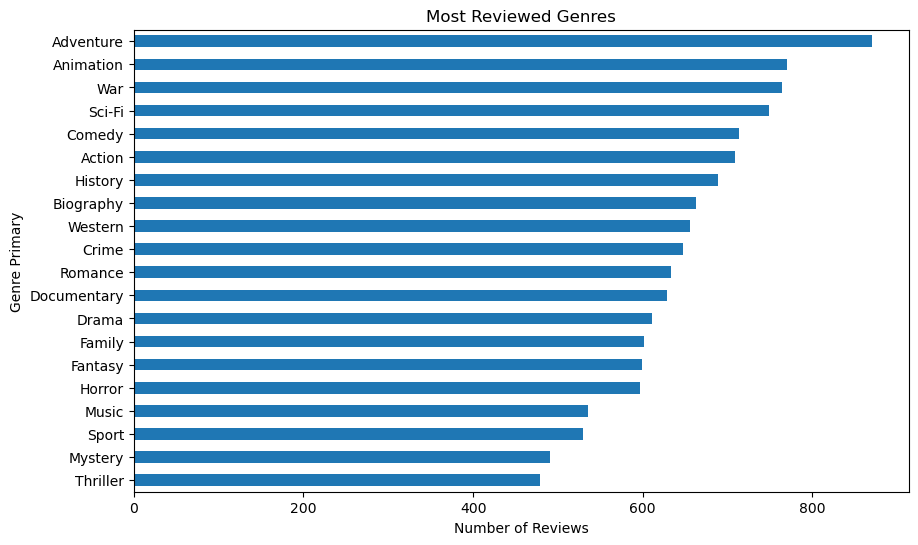

In [108]:
# sort in reverse order
most_reviewed_genres = most_reviewed_genres.sort_values(by='count', ascending=True)
most_reviewed_genres.plot(kind='barh', figsize=(10, 6), legend=False, title='Most Reviewed Genres', xlabel='Number of Reviews', ylabel='Genre Primary')